In [0]:
%tensorflow_version 2.x

## step0: 載入資料並觀察

In [2]:
# TensorFlow v2.0 已完整支持 Keras v2.3 -> tensorflow.keras
# 載入資料集：mnist_handwritten_digits
from tensorflow.keras.datasets.mnist import load_data

load_data()
# return a Tuple of Numpy arrays: ((x_train, y_train), (x_test, y_test))

11493376/11490434 [==============================] - 0s 0us/step


((array([[[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         ...,
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          ...,
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0]],
  
         [[0, 0, 0, ..., 0, 0, 0],
          [0, 0, 0, ..., 0, 0, 0

In [0]:
(x_train, y_train), (x_test, y_test) = load_data()

In [4]:
# shape 維度：return (資料筆數, 圖片高, 圖片寬, 像素通道數)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


5


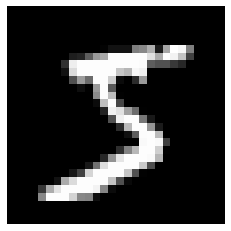

In [5]:
import matplotlib.pyplot as plt
%matplotlib inline

print(y_train[0])
plt.axis("off")
plt.imshow(x_train[0], cmap="gray")

In [6]:
import pandas as pd

pd.DataFrame(x_train[0])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,3,18,18,18,126,136,175,26,166,255,247,127,0,0,0,0
6,0,0,0,0,0,0,0,0,30,36,94,154,170,253,253,253,253,253,225,172,253,242,195,64,0,0,0,0
7,0,0,0,0,0,0,0,49,238,253,253,253,253,253,253,253,253,251,93,82,82,56,39,0,0,0,0,0
8,0,0,0,0,0,0,0,18,219,253,253,253,253,253,198,182,247,241,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,80,156,107,253,253,205,11,0,43,154,0,0,0,0,0,0,0,0,0,0


## step1: 資料預處理

### 對題目做 normalize (常態化)
1. tensorflow MLP 規定 input 只能是一維 (1D)，故要做 reshape
2. input 介於 [0, 1] 或 [-1, 1] 較方便設定權值並迭代，故要除 255
3. 除 255，是因為圖片顏色介於 [0, 255]

In [7]:
#                              ↓ -1 是請python幫忙計算
x_train_norm = x_train.reshape(-1, 784) / 255
x_test_norm  = x_test.reshape(-1, 784) / 255
# x_train_norm = x_train.reshape(60000, 784) / 255
# x_test_norm  = x_test.reshape(10000, 784) / 255

pd.DataFrame(x_train_norm[0])

,0
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0
...,...
779,0.0
780,0.0
781,0.0
782,0.0


### 對答案做 one-hot encoding
- 將答案變成機率的格式：`[P0, P1, P2, ... , P9]`
- 例如預測「 5 」的機率：`[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]`

In [8]:
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train)
y_test_cat  = to_categorical(y_test)

print('前：', y_train[0])
print('後：', y_train_cat[0])

前： 5
後： [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## step2: 訓練模型

### 建立模型：Sequential
-  就像蛋糕支架（`Sequential`）上，堆著一層層（`Layers`）的蛋糕
- `Dense` 是全連接層，指每個神經元 (units) 都要相互連結

```
Dense(
    units=128,          # 128 個神經元，選 64, 128, 256 都可
    activation="relu",  # 激活函數：中間層必選 "relu"，最終層可選 "sigmoid" 或 "softmax"
    input_dim=784       # 28*28=784像素(pixel)
)
```

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

mlp = Sequential()
mlp.add(Dense(128, activation="relu", input_dim=784)) # 第一層
mlp.add(Dense(10, activation="softmax"))              # 第二層
mlp.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


#### **Param(eter) 就是需要被調整的權值/參數**

我們需要調整每個激活函數的偏差 $bias$，使其從零點開始：$ y=ax+b $  

因此 $ \text{Parameter numbers}  = input \times output + bias_{output} $     
- $ \text{Param} = 784 \times 128 + 128 = 100480 $  
- $ \text{Param} = 128 \times 10 + 10 = 1290 $  

而這裡的 $bias$ 也是神經網路算出來的：
$ bias = b = -\large \frac{\partial Loss}{\partial b} $  


### 確定模型訓練方式

#### **loss損失函數 與 activation激活函數 的選擇**
- 中間層 `activation="relu"`
- 最終層 `unit=1`：`activation="sigmoid"`、`loss="binary_crossentropy"` -------> 只輸出一個神經元   
- 最終層 `unit>1`：`activation="softmax"`、`loss="categorical_crossentropy"` --> 輸出多個神經元 

使用亂度 (entropy) 來衡量**機率**的差距
- $ log(\large\frac{1}{p_i} \normalsize) $：容易猜錯的程度 = 原雜亂程度   
- $ log(\large\frac{1}{q_i} \normalsize) $：預測機率的亂度


- relative_entropy KL散度 = $ \sum p_i \times log(\large\frac{p_i}{q_i} \normalsize) $  
- cross_entropy 　交叉熵 = $ \sum p_i \times log(\large\frac{1}{q_i} \normalsize) $
- binary_crossentropy = $ p \times log(\large\frac{1}{q} \normalsize ) + (1-p) \times log(\large\frac{1}{q}\normalsize) $ 
- categorical_crossentropy = $ \sum p_i \times log(\large\frac{1}{q_i}\normalsize) $ 


#### **optimizer優化器 的選擇**
- 隨機梯度下降：$ w_{new} = w_{now} - \frac{\partial Loss}{\partial w} × \alpha $

- `Momentum`：是模擬物理動量概念，在同方向的維度上學習速度會變快，方向改變的時候學習速度會變慢
- `AdaGrad`：因大步走容易錯過 (overfitting)，小步走浪費時間；所以一開始大步走，隨著時間慢慢小步走  
    　　　　　（前期梯度較小時放大學習率，後期梯度較大時約束學習率 ）

- `adam` 是綜合「`Momentum` 速度」和「`AdaGrad` 步長」的動態優化（優化梯度下降）
  - 優化速度：才有機會跨過局部最小，找到全局最小
  - 優化步長 $\alpha$：才能達到速度最快，且不會錯過最小值



     
  


In [0]:
mlp.compile(loss="categorical_crossentropy", 
            optimizer="adam", 
            metrics=["accuracy"])

# 也可以用引入函式的方式帶入 loss 值
# from tensorflow.keras.losses import CategoricalCrossentropy
# mlp.compile(loss=CategoricalCrossentropy(), 
#             optimizer="adam", 
#             metrics=["accuracy"])

### 訓練模型

```
mlp.fit(x_train_norm, 
        y_train_cat, 
        batch_size=200,        # 看多少筆資料進行一次梯度下降的修正
        epochs=15,             # 整份資料要看幾遍；多不一定好，過度訓練會過擬合
        validation_split=0.1,  # train_test_split 切出一成做為測試資料
        verbose=2              # log 顯示模式（0:沒有、1:有進度條、2:每輪一行）
        )
```
- 全部資料 60000 筆 = 訓練資料 60000\*0.9=54000 筆 + 測試資料 60000\*0.1=6000 筆

- 對於訓練資料為了 min(LOSS) 以達到最佳預測結果，因此每 200 筆資料會進行一次梯度修正（`batch_size=200`），故共有 54000/200*15=270 次梯度修正；而對於測試資料不進行梯度修正

- 看模型訓練的好不好，要看 **`val_loss`(測試的誤差)** 或 `val_accuracy`(測試的預測正確率)

In [11]:
mlp.fit(x_train_norm, 
        y_train_cat, 
        batch_size=200,
        epochs=15,
        validation_split=0.1,
        verbose=2
        )

Epoch 1/15
270/270 - 1s - loss: 0.4310 - accuracy: 0.8826 - val_loss: 0.1851 - val_accuracy: 0.9522
Epoch 2/15
270/270 - 1s - loss: 0.1976 - accuracy: 0.9440 - val_loss: 0.1380 - val_accuracy: 0.9620
Epoch 3/15
270/270 - 1s - loss: 0.1469 - accuracy: 0.9579 - val_loss: 0.1111 - val_accuracy: 0.9673
Epoch 4/15
270/270 - 1s - loss: 0.1152 - accuracy: 0.9675 - val_loss: 0.0987 - val_accuracy: 0.9723
Epoch 5/15
270/270 - 1s - loss: 0.0941 - accuracy: 0.9731 - val_loss: 0.0923 - val_accuracy: 0.9745
Epoch 6/15
270/270 - 1s - loss: 0.0796 - accuracy: 0.9776 - val_loss: 0.0874 - val_accuracy: 0.9763
Epoch 7/15
270/270 - 1s - loss: 0.0679 - accuracy: 0.9809 - val_loss: 0.0831 - val_accuracy: 0.9773
Epoch 8/15
270/270 - 1s - loss: 0.0579 - accuracy: 0.9832 - val_loss: 0.0845 - val_accuracy: 0.9762
Epoch 9/15
270/270 - 1s - loss: 0.0504 - accuracy: 0.9860 - val_loss: 0.0790 - val_accuracy: 0.9790
Epoch 10/15
270/270 - 1s - loss: 0.0439 - accuracy: 0.9879 - val_loss: 0.0754 - val_accuracy: 0.9790

## step3: 預測結果

In [12]:
# predict 機率
# predict_classes 分類/類別
pre = mlp.predict_classes(x_test_norm)
pre

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7, 2, 1, ..., 4, 5, 6])

## step4: 驗證模型

In [13]:
mlp.evaluate(x_test_norm, y_test_cat)

313/313 [==============================] - 0s 1ms/step - loss: 0.0735 - accuracy: 0.9776


[0.07350342720746994, 0.9775999784469604]

### 分類準確性評估 (混淆矩陣)

In [14]:
from sklearn.metrics import confusion_matrix
import numpy as np

c = [f"{i}(預測)" for i in range(10)] 
i = [f"{i}(正確)" for i in range(10)] 
mat = confusion_matrix(y_test, pre)
mat = [np.round(row/sum(row), 4) for row in mat]

pd.DataFrame(mat, columns=c, index=i)

,0(預測),1(預測),2(預測),3(預測),4(預測),5(預測),6(預測),7(預測),8(預測),9(預測)
0(正確),0.9918,0.0000,0.0010,0.0010,0.0000,0.0000,0.0010,0.0010,0.0031,0.0010
1(正確),0.0000,0.9912,0.0009,0.0009,0.0000,0.0009,0.0026,0.0009,0.0026,0.0000
2(正確),0.0029,0.0058,0.9680,0.0029,0.0010,0.0010,0.0010,0.0058,0.0107,0.0010
3(正確),0.0010,0.0000,0.0020,0.9822,0.0010,0.0059,0.0000,0.0040,0.0030,0.0010
4(正確),0.0020,0.0000,0.0000,0.0010,0.9837,0.0000,0.0031,0.0020,0.0020,0.0061
5(正確),0.0022,0.0011,0.0000,0.0101,0.0011,0.9709,0.0067,0.0011,0.0056,0.0011
6(正確),0.0073,0.0031,0.0000,0.0010,0.0042,0.0031,0.9791,0.0000,0.0021,0.0000
7(正確),0.0000,0.0068,0.0088,0.0058,0.0000,0.0000,0.0000,0.9737,0.0010,0.0039
8(正確),0.0072,0.0010,0.0010,0.0062,0.0062,0.0021,0.0021,0.0041,0.9651,0.0051
9(正確),0.0020,0.0040,0.0000,0.0069,0.0089,0.0040,0.0000,0.0040,0.0020,0.9683


### 印出預測錯誤的圖像
- MLP的缺點：電腦用像素 (pixel) 看世界


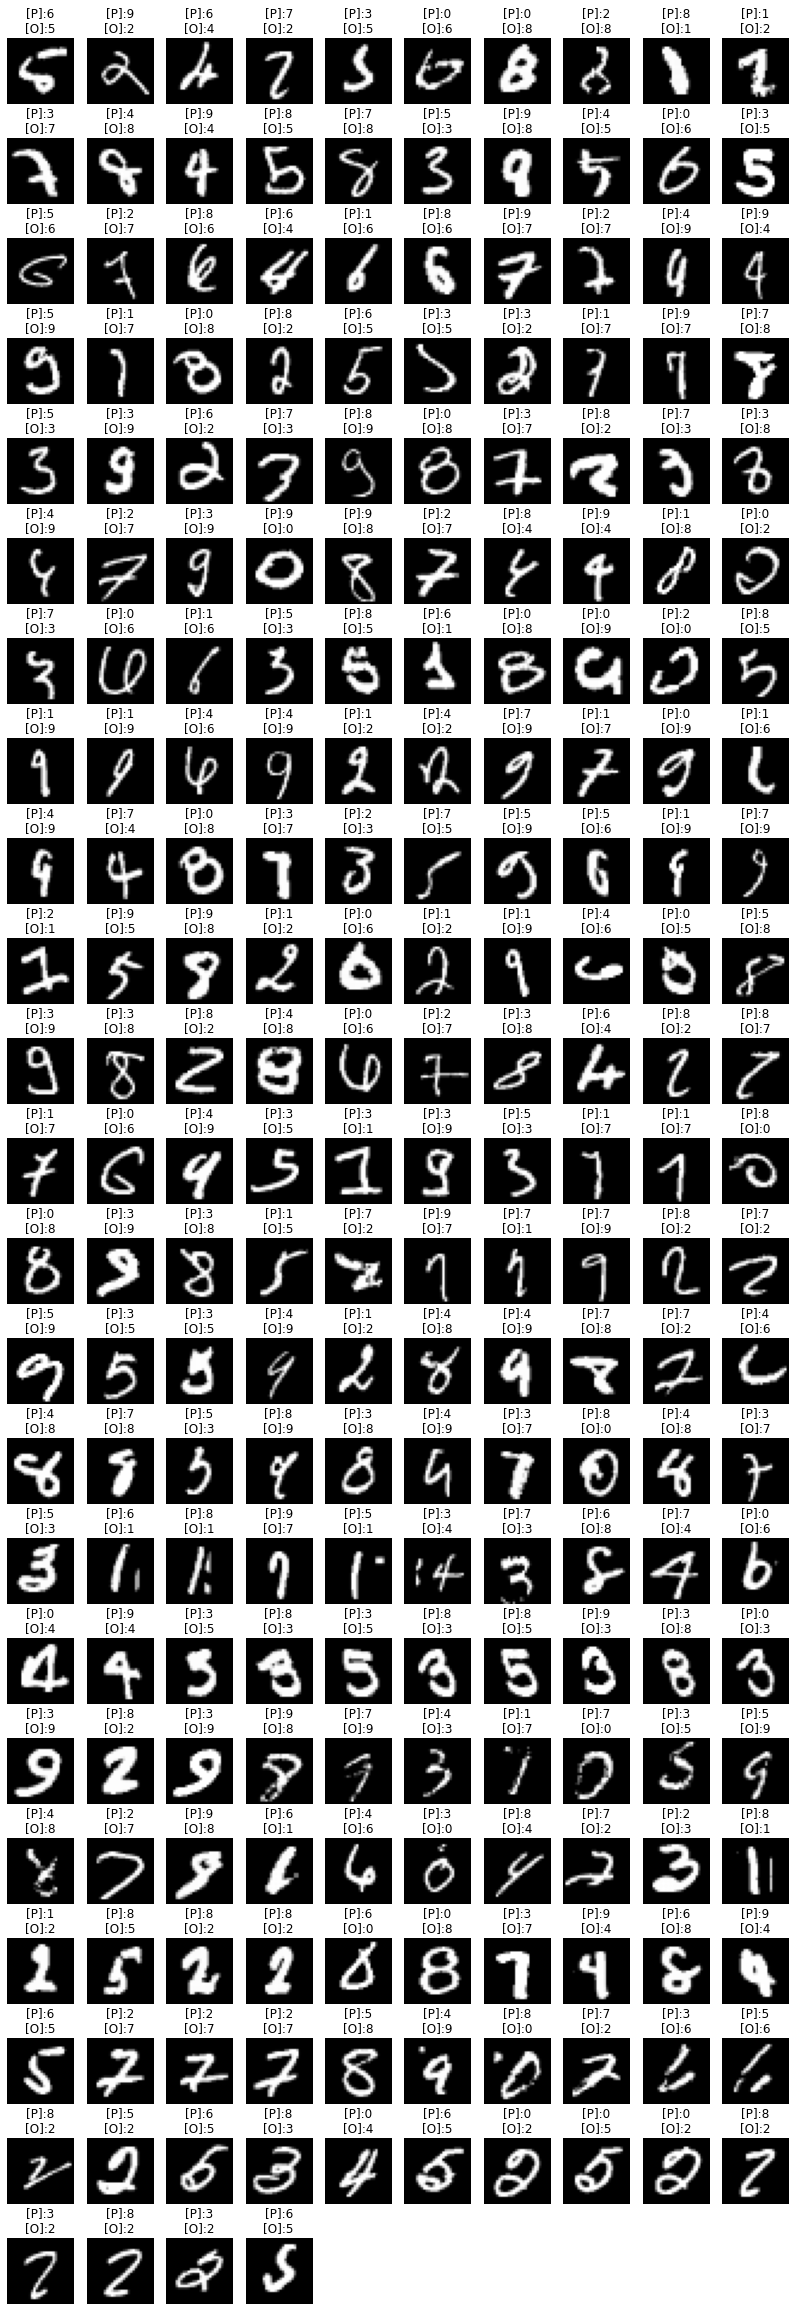

In [15]:
# 是一個 tuple 因為可以是 2D 圖片
# list  取值方法：list[一個數字]
# numpy 取值方法：nparray[[多個數字]] -> 可以代替 for-in 的取值方法
idx = np.nonzero(pre != y_test)[0]
false_pre_img = x_test[idx]
false_pre_label = y_test[idx]
false_pre_predict = pre[idx]

plt.figure(figsize=(14, 42))
width = 10   # 一列10個
height = len(idx) // width + 1

for i, img in enumerate(false_pre_img):    
    plt.subplot(height, width, i+1)  # subplot(總高, 總寬, 第i張)
    plt.title(f"[P]:{false_pre_predict[i]}\n[O]:{false_pre_label[i]}")
    plt.axis("off")
    plt.imshow(img, cmap="gray")

## 使用者上傳手寫數字，讓模型辨識

請輸入檔名: 1.png
我猜答案是: 1


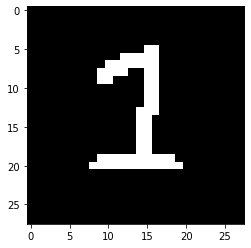

In [16]:
from tensorflow.keras.preprocessing.image import load_img

f = input("請輸入檔名: ")
img_raw = load_img(f, target_size=(28, 28)).convert("L")
img = np.array(img_raw).reshape(1, 784) / 255
answer = mlp.predict_classes(img)[0]
print("我猜答案是:", answer)
plt.imshow(img_raw, cmap="gray")